In [131]:
%matplotlib inline

# Notebook zum Rumspielen #

## Manipulationen visualisieren ##

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize, scale

import helper

Deutsches Beispielkorpus einlesen, Terme mit df < 2 entfernen, in relative Häufigkeiten umwandeln, 1000 häufigste Terme extrahieren, Termfrequenzen standardisieren, in numpy-Arrays konvertieren:

In [133]:
data = helper.read_csv_pandas("data/delta_corpus_DE.csv")
terms, documents, authors, data = helper.pandas_to_numpy(data)

### Rohe z-scores ###

ARI for Burrows's Delta: 0.670


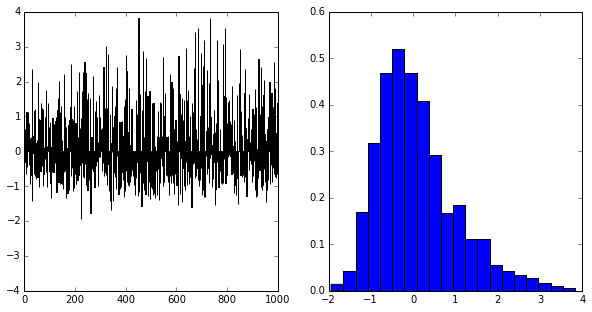

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_ylim((-4,4))
ax1.bar(range(len(data[0])), data[0])
ax2.hist(data[0], bins=20, normed=True)
fig.show()
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(data)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

### Abgeschnitten bei ±2 ###

ARI for Burrows's Delta: 0.822


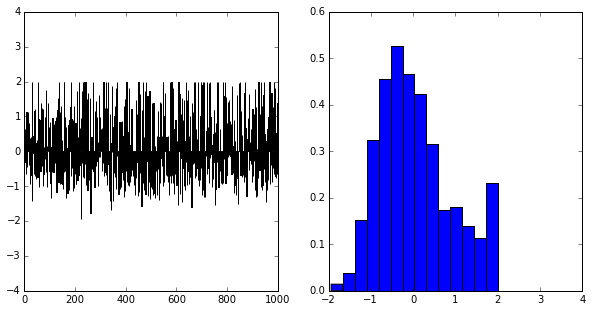

In [151]:
cutoff2 = data.copy()
cutoff2[cutoff2 > 2] = 2
cutoff2[cutoff2 < -2] = -2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_ylim((-4,4))
ax1.bar(range(len(cutoff2[0])), cutoff2[0])
ax2.set_xlim(-2, 4)
ax2.hist(cutoff2[0], bins=14, normed=True)
fig.show()
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(cutoff2)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

### Abgeschnitten bei ±1 ###

ARI for Burrows's Delta: 0.902


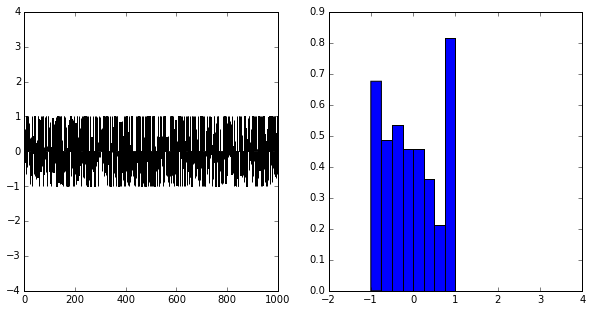

In [153]:
cutoff1 = data.copy()
cutoff1[cutoff1 > 1] = 1
cutoff1[cutoff1 < -1] = -1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_ylim((-4,4))
ax1.bar(range(len(cutoff1[0])), cutoff1[0])
ax2.set_xlim(-2, 4)
ax2.hist(cutoff1[0], bins=8, normed=True)
fig.show()
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(cutoff1)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

### Binarisiert ###

ARI for Burrows's Delta: 0.806


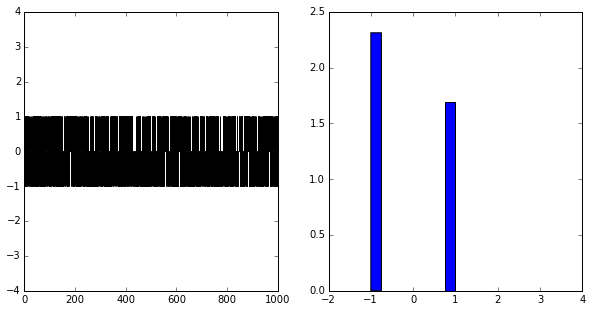

In [154]:
binarized = data.copy()
means = np.mean(binarized, axis=1)
for d, m in zip(binarized, means):
    d[d >= m] = 1
    d[d < m] = -1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_ylim((-4,4))
ax1.bar(range(len(binarized[0])), binarized[0])
ax2.set_xlim(-2, 4)
ax2.hist(binarized[0], bins=8, normed=True)
fig.show()
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(binarized)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

### Quantile/Ränge ###

ARI for Burrows's Delta: 0.862


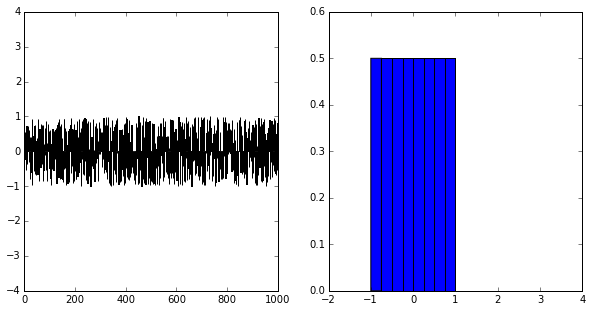

In [155]:
ranks = np.zeros(shape=data.shape)
for i, d in enumerate(data):
    ranks[i] = scipy.stats.rankdata(d)
ranks_std = (ranks - ranks.min(axis=1).reshape(-1, 1)) / (ranks.max(axis=1) - ranks.min(axis=1)).reshape(-1, 1)
ranks_scaled = ranks_std * 2 - 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_ylim((-4,4))
ax1.bar(range(len(ranks_scaled[0])), ranks_scaled[0])
ax2.set_xlim(-2, 4)
ax2.set_ylim(0, 0.6)
ax2.hist(ranks_scaled[0], bins=8, normed=True)
fig.show()
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(ranks_scaled)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

## Clustering ##

In [27]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

import helper

Deutsches Beispielkorpus einlesen, Terme mit df < 2 entfernen, in relative Häufigkeiten umwandeln, 1000 häufigste Terme extrahieren, Termfrequenzen standardisieren, in numpy-Arrays konvertieren:

In [28]:
data = helper.read_csv_pandas("data/delta_corpus_DE.csv")
terms, documents, authors, data = helper.pandas_to_numpy(data)

Clustern und Clustering evaluieren:

In [29]:
# Burrows's delta
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(data)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

# Burrows's delta with vector normalization
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(normalize(data, norm="l1", axis=1))
print("ARI for Burrows's Delta with vector normalization: %.3f" % metrics.adjusted_rand_score(authors, clusters))

# cosine delta
clusters = AgglomerativeClustering(n_clusters=25, affinity="cosine", linkage="complete").fit_predict(data)
print("ARI for cosine delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))


ARI for Burrows's Delta: 0.670
ARI for Burrows's Delta with vector normalization: 0.928
ARI for cosine delta: 0.928


Experiment mit bei ±2 abgeschnittenen z-scores wiederholen. Burrow's Delta profitiert, die explizit oder implizit normalisierten Varianten sind unverändert:

In [30]:
data = helper.read_csv_pandas("data/delta_corpus_DE.csv")
data[data > 2] = 2
data[data < -2] = -2
terms, documents, authors, data = helper.pandas_to_numpy(data)

# Burrows's delta
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(data)
print("ARI for Burrows's Delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

# Burrows's delta with vector normalization
clusters = AgglomerativeClustering(n_clusters=25, affinity="manhattan", linkage="complete").fit_predict(normalize(data, norm="l1", axis=1))
print("ARI for Burrows's Delta with vector normalization: %.3f" % metrics.adjusted_rand_score(authors, clusters))

# cosine delta
clusters = AgglomerativeClustering(n_clusters=25, affinity="cosine", linkage="complete").fit_predict(data)
print("ARI for cosine delta: %.3f" % metrics.adjusted_rand_score(authors, clusters))

ARI for Burrows's Delta: 0.822
ARI for Burrows's Delta with vector normalization: 0.928
ARI for cosine delta: 0.928


## z-scores abschneiden ##

In [52]:
import helper

Deutsches Beispielkorpus einlesen, Terme mit df < 2 entfernen, in relative Häufigkeiten umwandeln, 1000 häufigste Terme extrahieren, Termfrequenzen standardisieren:

In [53]:
data = helper.read_csv_pandas("data/delta_corpus_DE.csv")
data.shape

(75, 1000)

Schneide z-scores bei 2 bzw. -2 ab:

In [54]:
data[data > 2] = 2
data[data < -2] = -2

## Verteilung der z-scores plotten ##

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.preprocessing import normalize

import helper

Deutsches Beispielkorpus einlesen (geht auch viel komfortabler mit `helper.read_csv_pandas()`):

In [56]:
data = pd.read_csv("data/delta_corpus_DE.csv", sep=",", index_col=0)
print("Shape:", data.shape)
data.head()
# Ohne pandas:
# terms, documents, matrix = helper.read_csv("data/delta_corpus_DE.csv")
# authors = helper.extract_authors_from_document_names(documents)

Shape: (255358, 75)


,"Spielhagen,-Friedrich_Zum Zeitvertreib.txt","Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt","Marlitt,-Eugenie_Goldelse.txt","Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt","Huber,-Therese_Luise.txt","Hauff,-Wilhelm_Lichtenstein.txt","May,-Karl_Kurdistan.txt","Fontane,-Theodor_Effi Briest.txt","Fouqué,-Caroline-de-la-Motte_Die Frau des Falkensteins.txt","Hahn-Hahn,-Ida-Gräfin-von_Gräfin Faustine.txt",...,"Arnim,-Ludwig-Achim-von_Kronenwächter 1.txt","Spielhagen,-Friedrich_Problematische Naturen. Erste Abtheilung.txt","Fouqué,-Caroline-de-la-Motte_Magie der Natur.txt",Jean-Paul_Flegeljahre.txt,"Huber,-Therese_Die Familie Seldorf.txt","Ebner-Eschenbach,-Marie-von_Bozena.txt","Tieck,-Ludwig_Geschichte des Herrn William Lovell.txt","May,-Karl_Old Surehand I.txt","Wieland,-Christoph-Martin_Die Abenteuer des Don Sylvio von Rosalva.txt","Schopenhauer,-Johanna_Gabriele.txt"
und,1131,1372,2973,2460,950,3752,4045,3440,2110,2337,...,2749,5081,1403,5907,2876,1986,5444,4093,3038,3919
die,1370,858,2569,1137,793,2877,2650,1801,1425,1595,...,2494,4583,1027,3759,2149,1508,3323,2631,3194,2790
der,1262,743,1995,1468,567,2964,2757,1423,1135,1322,...,2619,4181,878,3934,1940,1252,2429,2253,2322,3090
zu,855,579,1261,763,1091,1681,2113,982,916,1054,...,1309,2675,599,1851,1551,940,2128,2526,2377,3292
in,872,479,1438,859,487,1633,1451,1040,1022,944,...,1362,3005,689,2032,1339,794,2357,1269,1774,2540


Für Scikit-learn müssen wir das Dataframe transponieren:

In [57]:
data = data.transpose()
print("Shape:", data.shape)
data.head()

Shape: (75, 255358)


,und,die,der,zu,in,er,den,sie,ich,nicht,...,Spatdrüse,Spatenträgern,Spatherbst,Spatregen,Spatzengehirn,Spatzengezwitscher,Spatzenhaufen,Spatzenköpfen,Spas,ῥοη
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",1131,1370,1262,855,872,688,670,672,444,780,...,0,0,0,0,0,0,0,0,0,0
"Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt",1372,858,743,579,479,380,373,591,936,459,...,0,0,0,0,0,0,0,0,0,0
"Marlitt,-Eugenie_Goldelse.txt",2973,2569,1995,1261,1438,932,1286,1634,786,946,...,0,0,0,0,0,0,0,0,0,0
"Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt",2460,1137,1468,763,859,469,757,355,1015,719,...,0,0,0,0,0,0,0,0,0,0
"Huber,-Therese_Luise.txt",950,793,567,1091,487,451,352,1329,61,369,...,0,0,0,0,0,0,0,0,0,0


Wir entfernen alle Terme, die nur in einem einzigen Dokument vorkommen:

In [58]:
data = data[data.columns[data.sum(axis=0) > 1]]
print("Shape:", data.shape)
data.head()
# matrix, terms = helper.transform_to_relative_frequency(matrix, terms, min_df=2)

Shape: (75, 126927)


,und,die,der,zu,in,er,den,sie,ich,nicht,...,Katholicität,Sommerhitze,Abrichten,impressioniert,Nebelwind,Schulfreundinnen,tausendste,Nadelbüschel,unheilvoller,Schulfenster
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",1131,1370,1262,855,872,688,670,672,444,780,...,0,0,0,0,0,0,0,0,0,0
"Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt",1372,858,743,579,479,380,373,591,936,459,...,0,0,0,0,0,0,0,0,0,0
"Marlitt,-Eugenie_Goldelse.txt",2973,2569,1995,1261,1438,932,1286,1634,786,946,...,0,0,0,0,0,0,0,0,0,0
"Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt",2460,1137,1468,763,859,469,757,355,1015,719,...,0,0,0,0,0,0,0,0,0,0
"Huber,-Therese_Luise.txt",950,793,567,1091,487,451,352,1329,61,369,...,0,0,0,0,0,0,0,0,0,0


Wir wandeln die absoluten Häufigkeiten in relative um, extrahieren die 1000 häufigsten Terme und standardisieren die Merkmale (z-scores):

In [59]:
data = data.div(data.sum(axis=1), axis=0)
data = data[data.sum(axis=0).order(ascending=False).head(1000).index]
data = (data - data.mean(axis=0)) / data.std(axis=0)
print("Shape:", data.shape)
data.head()
# matrix, terms = helper.select_most_frequent(matrix, terms, 1000)
# z_scores = scipy.stats.zscore(matrix, axis=0, ddof=1)

Shape: (75, 1000)


,und,die,der,zu,in,sie,ich,er,den,nicht,...,sitzen,Volk,schienen,Judith,keinem,bekommen,reichte,Vor,fünf,Arzt
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",-1.876853,0.265996,0.305365,0.056052,0.633989,-0.319778,-0.639620,0.075507,0.305346,1.115073,...,-0.699188,-0.751790,-0.076962,-0.194606,0.512624,-0.062008,-0.641142,-0.106634,1.394307,-0.768305
"Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt",0.596186,-0.357249,-0.467486,-0.032093,-0.818845,0.296559,1.638916,-0.639030,-0.735518,0.258243,...,1.388732,-0.427777,-0.214960,-0.194606,-1.661166,-0.952873,0.517892,-0.791668,-0.599061,-0.688995
"Marlitt,-Eugenie_Goldelse.txt",-0.225652,0.726087,-0.194233,-0.557765,0.226136,0.569910,-0.627299,-0.721696,0.814960,-0.632250,...,-1.077405,-0.727358,-0.400876,-0.194606,-1.129093,-0.444078,1.831179,-0.061218,-0.466330,0.074675
"Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt",1.342646,-1.325699,0.601156,-0.678550,-0.098238,-1.509341,0.563260,-1.263925,0.449260,0.194154,...,4.031084,-0.298963,-0.732048,-0.194606,1.444354,-0.466930,0.033657,-0.843246,0.478631,-0.947234
"Huber,-Therese_Luise.txt",-1.162797,-0.781105,-1.490148,3.359030,-0.705023,3.948535,-1.533152,-0.102036,-0.960199,-0.674144,...,-0.303570,-0.923544,0.086601,-0.194606,0.588097,0.079538,0.923476,-0.788194,-0.240527,1.126353


Umwandlung in ein numpy-Array:

In [60]:
z_scores = np.array(data)

Wir plotten ein Histogramm der Merkmale eines Dokuments und legen die entsprechende Normalverteilung darüber:

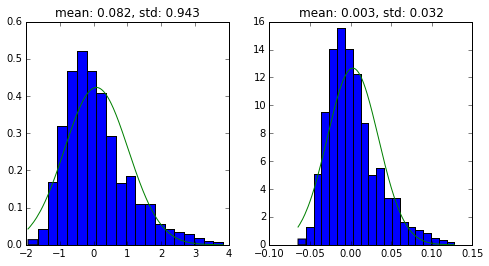

In [61]:
sorted_z_scores = np.sort(z_scores[0])
fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(sorted_z_scores, bins=20, normed=True)
ax1.plot(sorted_z_scores, fit)
ax1.set_title("mean: %.3f, std: %.3f" % (np.mean(sorted_z_scores), np.std(sorted_z_scores)))
normalized_features = np.sort(normalize(sorted_z_scores, norm="l2")[0])
fit_normalized = scipy.stats.norm.pdf(normalized_features, np.mean(normalized_features), np.std(normalized_features))
ax2.hist(normalized_features, bins=20, normed=True)
ax2.plot(normalized_features, fit_normalized)
ax2.set_title("mean: %.3f, std: %.3f" % (np.mean(normalized_features), np.std(normalized_features)))
f.show()

Das sieht nicht normalverteilt aus; ein Shapiro-Wilk-Test bestätigt diesen Eindruck:

In [62]:
print("Shapiro-Wilk: p = %.3e" % scipy.stats.shapiro(sorted_z_scores)[1])

Shapiro-Wilk: p = 2.946e-19


Welche Wörter haben extrem hohe z-scores?

In [63]:
document = data.index[0]
print(document)
print(data.ix[document].mean())
print(data.ix[document].std())
data.ix[document][data.ix[document] > 3]
# print(documents[0])
# print(np.mean(z_scores[0]))
# print(np.std(z_scores[0]))
# terms[z_scores[0] > 3]

Spielhagen,-Friedrich_Zum Zeitvertreib.txt
0.0819555006457
0.943561140421


Seite        3.006404
paar         3.830931
bereits      3.425621
Um           3.539431
Professor    3.204216
Damen        3.812513
völlig       3.196663
durfte       3.079852
gegangen     3.526864
Name: Spielhagen,-Friedrich_Zum Zeitvertreib.txt, dtype: float64

Testen wir noch ein paar weitere Dokumente:

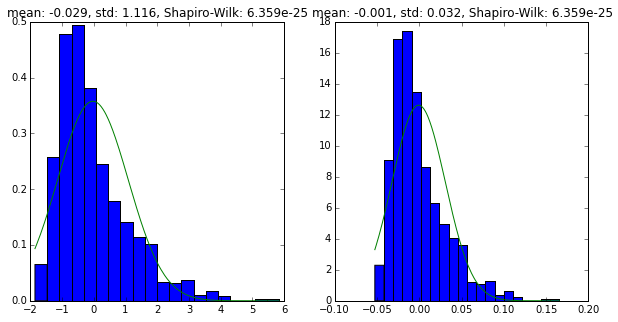

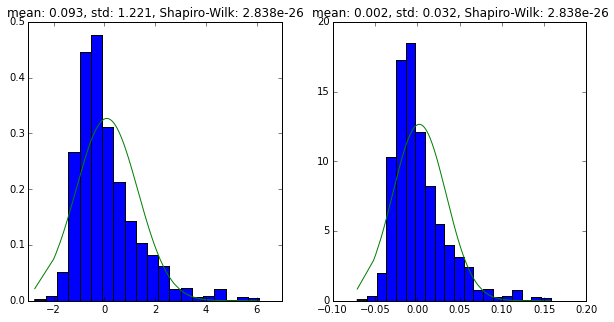

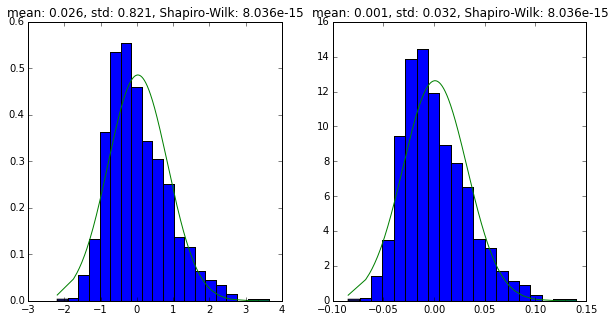

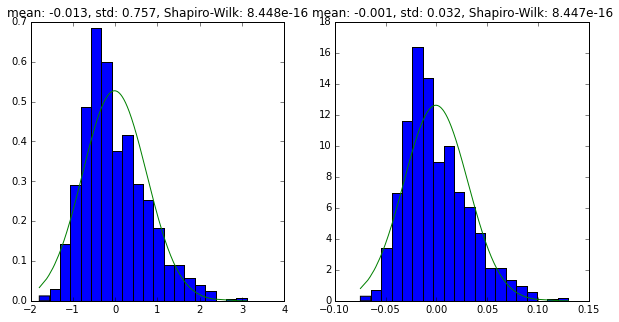

In [64]:
for i in [3,6,9,12]:
    sorted_z_scores = np.sort(z_scores[i])
    fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(sorted_z_scores, bins=20, normed=True)
    ax1.plot(sorted_z_scores, fit)
    ax1.set_title("mean: %.3f, std: %.3f, Shapiro-Wilk: %.3e" % (np.mean(sorted_z_scores), np.std(sorted_z_scores), scipy.stats.shapiro(sorted_z_scores)[1]))
    normalized_features = np.sort(normalize(sorted_z_scores, norm="l2")[0])
    fit_normalized = scipy.stats.norm.pdf(normalized_features, np.mean(normalized_features), np.std(normalized_features))
    ax2.hist(normalized_features, bins=20, normed=True)
    ax2.plot(normalized_features, fit_normalized)
    ax2.set_title("mean: %.3f, std: %.3f, Shapiro-Wilk: %.3e" % (np.mean(normalized_features), np.std(normalized_features), scipy.stats.shapiro(normalized_features)[1]))
    f.show()